## Hospital Readmission

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
#data
df=pd.read_csv("../data/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
pd.read_csv("../data/hospital_data.csv")

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


### EDA

In [4]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  di

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool

### Data Cleaning

In [7]:
# data cleaning
na_cols = df.columns[(df == '?').any()]
print(na_cols)

Index(['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3'],
      dtype='object')


In [8]:
# Replace missing entries as '?'
df.replace('?', np.nan, inplace=True)

In [9]:
# Drop columns with many missing values or IDs
drop_cols = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty']
df.drop(columns=drop_cols, inplace=True)
print("data shape: ",df.shape)

data shape:  (101766, 45)


In [10]:
df.age.value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [11]:
age_map = {
    '[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45,
    '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95
}
df['age_num'] = df['age'].map(age_map)
df.age_num.value_counts()

age_num
75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

In [12]:
df.readmitted.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [13]:
# df['readmitted_map'] = df['readmitted'].map({
#     '<30': 0,   #readmission, risk
#     '>30': 1,   #delayed readmission
#     'NO': 2     #no readmission
# })
# df.readmitted_map.value_counts()

In [14]:
# readmitted map no-o, 30-1
df['readmitted_map'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})
df.readmitted_map.value_counts()

readmitted_map
0    54864
1    46902
Name: count, dtype: int64

In [15]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_num', 'readmitted_map'],
      dtype='object')

In [16]:
# shape
print("After cleaning shape:", df.shape)
df.readmitted_map.value_counts(normalize=True)

After cleaning shape: (101766, 47)


readmitted_map
0    0.539119
1    0.460881
Name: proportion, dtype: float64

In [17]:
# Readmission by age group
age_summary = df.groupby('age_num')['readmitted_map'].agg(['mean','count']).sort_values('count', ascending=False)
age_summary.head(10)

,mean,count
age_num,,
75,0.481203,26068
65,0.462527,22483
55,0.439557,17256
85,0.482700,17197
45,0.444502,9685
35,0.426755,3775
95,0.400286,2793
25,0.450211,1657
15,0.382055,691


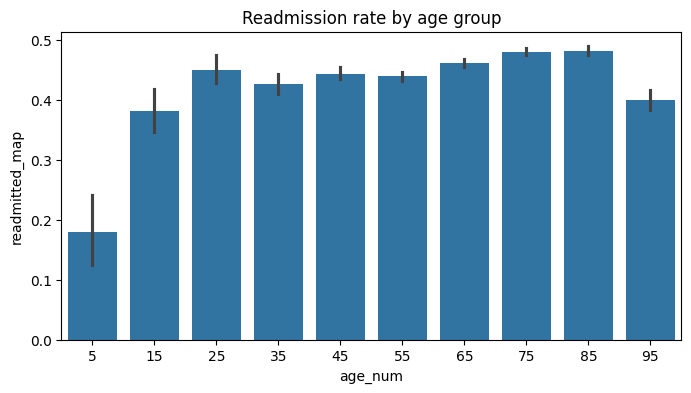

In [18]:
#AGE
plt.figure(figsize=(8,4))
sns.barplot(x='age_num', y='readmitted_map', data=df, order=sorted(df['age_num'].unique(), key=lambda x: age_map.get(x, 0)))
plt.xticks()#(rotation=45)
plt.title("Readmission rate by age group")
plt.show()

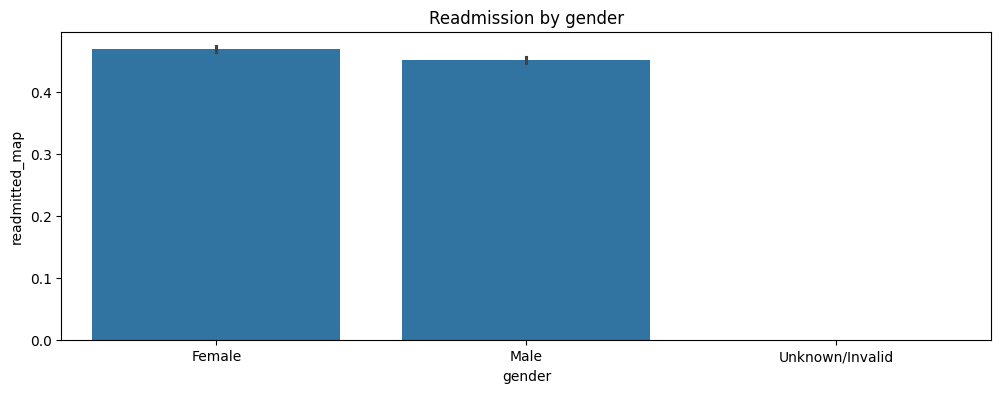

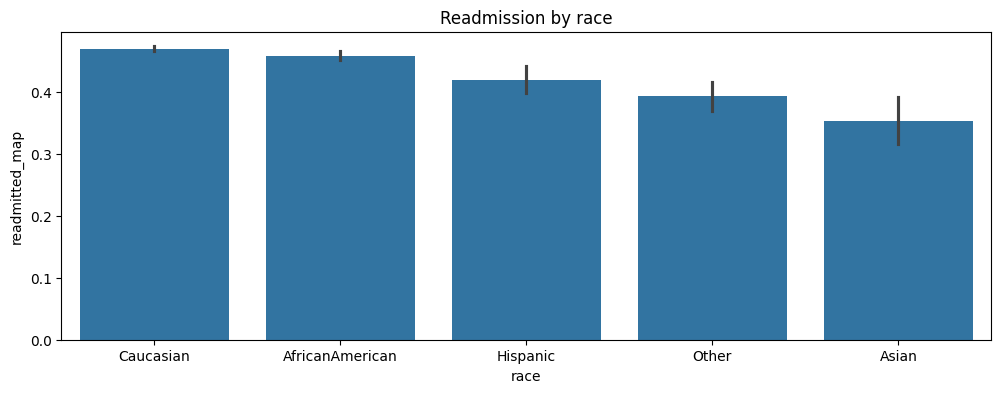

In [19]:
#Gender and race
plt.figure(figsize=(12,4))
sns.barplot(x='gender', y='readmitted_map', data=df)
plt.title("Readmission by gender")
plt.show()
# limit to top races
plt.figure(figsize=(12,4))
race_order = df['race'].value_counts().index
sns.barplot(x='race', y='readmitted_map', data=df, order=race_order)
plt.title("Readmission by race")
# plt.tight_layout()
plt.show()

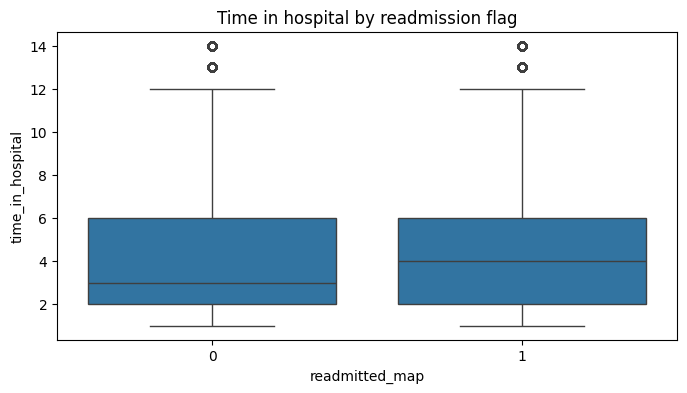

In [20]:
# Time-in-hospital distribution and readmission
plt.figure(figsize=(8,4))
sns.boxplot(x='readmitted_map', y='time_in_hospital', data=df)
plt.title("Time in hospital by readmission flag")
plt.show()

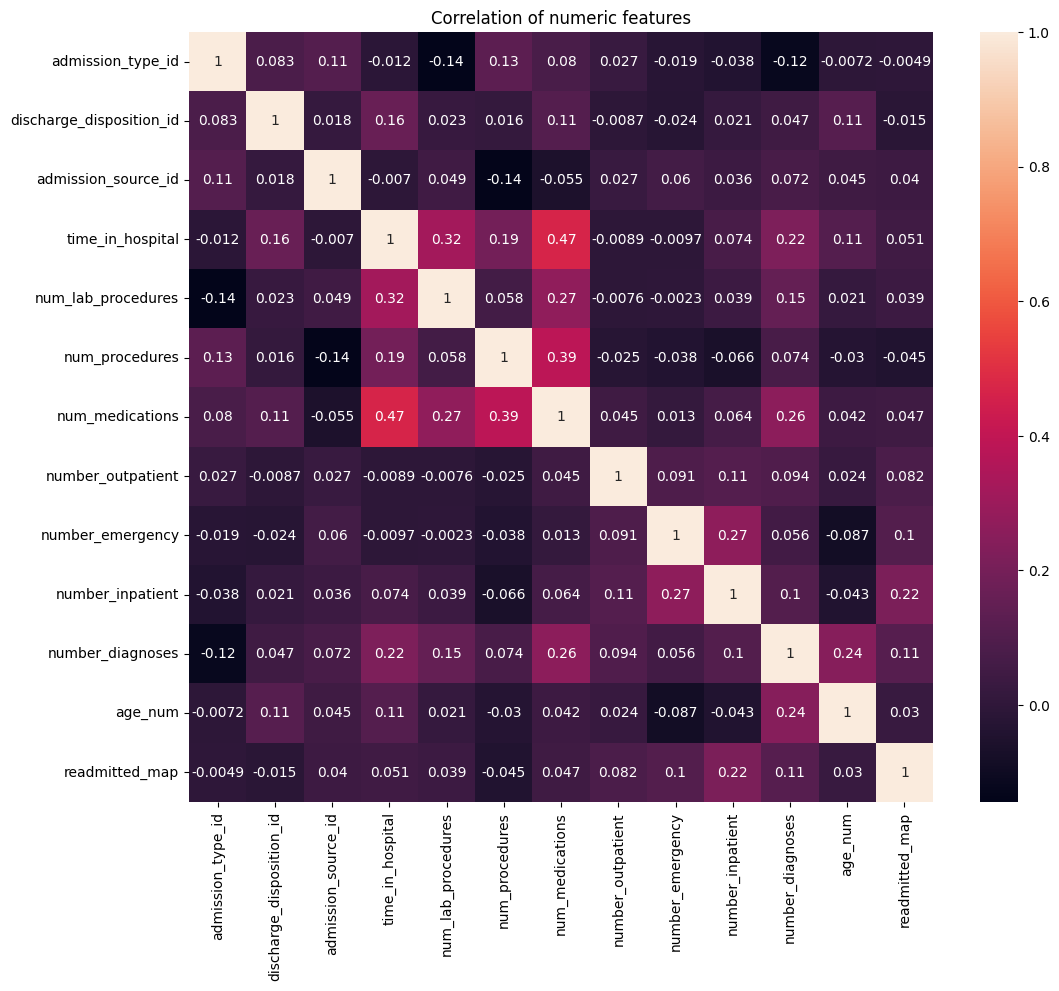

In [21]:
# Correlation heatmap for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation of numeric features")
plt.show()

In [22]:
# sns.pairplot(df,hue="readmitted_map")
# plt.show()

In [23]:
# Check skewness
print("Skew for numerical columns","\n",df[num_cols].skew())

Skew for numerical columns 
 admission_type_id            1.591984
discharge_disposition_id     2.563067
admission_source_id          1.029935
time_in_hospital             1.133999
num_lab_procedures          -0.236544
num_procedures               1.316415
num_medications              1.326672
number_outpatient            8.832959
number_emergency            22.855582
number_inpatient             3.614139
number_diagnoses            -0.876746
age_num                     -0.630539
readmitted_map               0.156960
dtype: float64


In [24]:
if 'number_inpatient' in df.columns:
    gp = df.groupby('number_inpatient')['readmitted_map'].agg(['mean','count']).reset_index()
    print(gp.head(10))

   number_inpatient      mean  count
0                 0  0.384948  67630
1                 1  0.547615  19521
2                 2  0.649352   7566
3                 3  0.697156   3411
4                 4  0.742293   1622
5                 5  0.800493    812
6                 6  0.841667    480
7                 7  0.809701    268
8                 8  0.907285    151
9                 9  0.882883    111


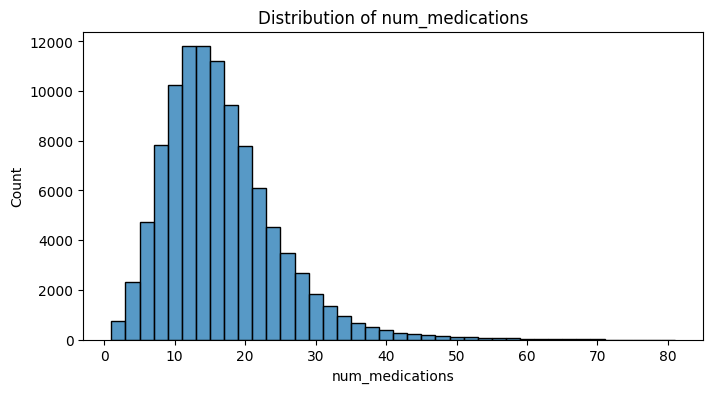

In [25]:
if 'num_medications' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['num_medications'], bins=40, kde=False)
    plt.title("Distribution of num_medications")
    plt.show()


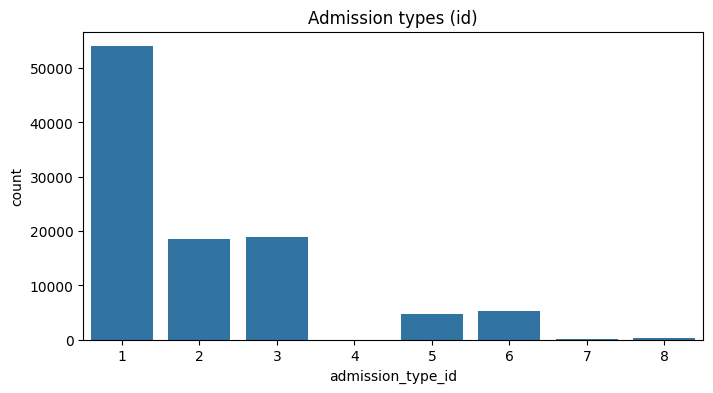

In [26]:
# Admission type and discharge disposition
if 'admission_type_id' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='admission_type_id', data=df)
    plt.title("Admission types (id)")
    plt.show()

In [27]:
df.iloc[1]

race                        Caucasian
gender                         Female
age                           [10-20)
admission_type_id                   1
discharge_disposition_id            1
admission_source_id                 7
time_in_hospital                    3
num_lab_procedures                 59
num_procedures                      0
num_medications                    18
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                            276
diag_2                         250.01
diag_3                            255
number_diagnoses                    9
max_glu_serum                     NaN
A1Cresult                         NaN
metformin                          No
repaglinide                        No
nateglinide                        No
chlorpropamide                     No
glimepiride                        No
acetohexamide                      No
glipizide                          No
glyburide   

In [28]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [29]:
# candidate_cols1 = [
#     'age_num', 'gender', 'race', 'time_in_hospital', 'num_lab_procedures',
#     'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
#     'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
#     'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed'
# ]

### Data Prep

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, accuracy_score, roc_curve, 
                            precision_recall_curve, average_precision_score, 
                            precision_score, recall_score, f1_score,
)
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


In [31]:
#preprocessing
candidate_cols = [
     'age_num', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
    'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed'
]

# Only features are used
X = df[candidate_cols].copy()
y = df['readmitted_map'].copy()

# Automatically detect numeric and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"Numeric: {len(num_features)} | Categorical: {len(cat_features)}")


Numeric: 12 | Categorical: 32


In [32]:
### Data split test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (81412, 44)
X_test shape:  (20354, 44)
Y_train shape:  (81412,)
Y_test shape:  (20354,)


### Base Model

C:\Users\sudwa\Desktop\ml_hospital_readmission\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.63      0.76      0.69     10973
           1       0.63      0.49      0.55      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.62     20354



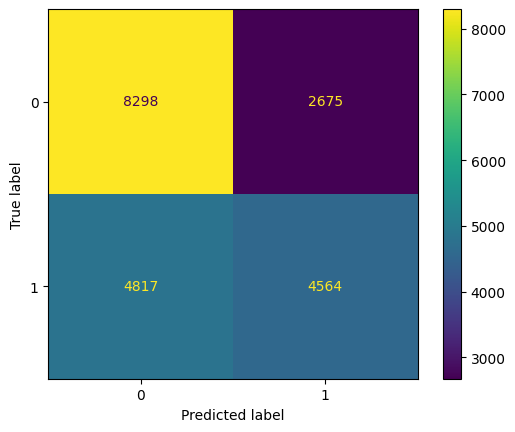

In [33]:
# Define pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

# 1. LogisticRegression 
logreg=LogisticRegression(random_state=42)
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])
clf.fit(X_train,y_train)
pred_logreg=clf.predict(X_test)

classification_report=metrics.classification_report(y_test,pred_logreg)
print(classification_report)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_logreg)


In [35]:
logreg_cv = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',

)

clf_vc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg_cv)
])

cv_scores = cross_val_score(
    clf_vc,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("CV ROC AUC:", cv_scores.mean())

clf_vc.fit(X_train, y_train)

# Predictions
y_pred = clf_vc.predict(X_test)
y_proba = clf_vc.predict_proba(X_test)

test_auc = roc_auc_score(y_test, y_proba)#, multi_class='ovr', average='macro')
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", acc)
print("Test ROC AUC:", test_auc)
print("\nReport:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

CV ROC AUC: 0.6685356748102684


ValueError: y should be a 1d array, got an array of shape (20354, 2) instead.

In [ ]:
# 3. LogisticRegression with cross val and ordinal
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_ordinal = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')


log_reg_cv = LogisticRegression()
clf_vc_ordinal = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('classifier', log_reg_cv)
])

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
print('LogisticRegression: ',log_reg_cv)
cv_scores = cross_val_score(clf_vc_ordinal, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
clf_vc_ordinal.fit(X_train, y_train)
# Evaluate on test
y_pred = clf_vc_ordinal.predict(X_test)
y_proba = clf_vc_ordinal.predict_proba(X_test)[:, 1] if hasattr(clf_vc, "predict_proba") else None

test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# 4. SVC linear
svc_linear = LinearSVC(max_iter=5000, random_state=42)

clf_svc = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('classifier', svc_linear)
])

print('svc linear:', svc_linear)

cv_scores = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
y_scores = clf_svc.decision_function(X_test)
test_auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
svc_acc=accuracy_score(y_test,y_pred_svc)
svc_recall=recall_score(y_test,y_pred_svc,average=None)
svc_f1=f1_score(y_test,y_pred_svc,average=None)
svc_precision=precision_score(y_test,y_pred_svc,average=None)
print(f"accuracy:{svc_acc} recall:{svc_recall} f1:{svc_f1} precision:{svc_precision}")

metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# 5. GradientBoostingClassifier
boost_classifier = GradientBoostingClassifier()

clf_boost = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', boost_classifier)
])
print('Boosting: ',boost_classifier)
cv_scores = cross_val_score(clf_boost, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
clf_boost.fit(X_train, y_train)
# Evaluate on test
y_pred = clf_boost.predict(X_test)
y_proba = clf_boost.predict_proba(X_test)[:, 1] if hasattr(clf_boost, "predict_proba") else None

test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# 6. AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()

clf_adaboost = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', adaboost_classifier)
])
print('Boosting: ',adaboost_classifier)
cv_scores = cross_val_score(clf_adaboost, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
clf_adaboost.fit(X_train, y_train)
# Evaluate on test
y_pred = clf_adaboost.predict(X_test)
y_proba = clf_adaboost.predict_proba(X_test)[:, 1] if hasattr(clf_adaboost, "predict_proba") else None

test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# 7. Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

clf_rf = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', rf_classifier)
])

print('Random Forest Classifier:', rf_classifier)
cv_scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
y_proba = clf_rf.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [ ]:
# 8. Tree Classifier
dt_classifier = DecisionTreeClassifier()

clf_tree = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', dt_classifier)
])
print('tree: ',dt_classifier)
# cv_scores = cross_val_score(clf_adaboost, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
# print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
clf_tree.fit(X_train, y_train)
# Evaluate on test
y_pred = clf_tree.predict(X_test)
y_proba = clf_tree.predict_proba(X_test)[:, 1] if hasattr(clf_tree, "predict_proba") else None

test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# 9. ExtraTree
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(
    n_estimators=50,          # Number of trees
    max_depth=None,           # Expand until all leaves are pure
    # min_samples_split=2,      # Default split rule
    random_state=42,
    n_jobs=-1
)

clf_extra = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', extra_trees)
])

print('Extra Trees Classifier:', extra_trees)

# Cross-validation ROC AUC
# cv_scores = cross_val_score(clf_extra, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
# print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

clf_extra.fit(X_train, y_train)

y_pred = clf_extra.predict(X_test)

# Probabilities (ExtraTrees supports predict_proba)
y_proba = clf_extra.predict_proba(X_test)[:, 1]

# Evaluate
test_auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [ ]:
# Get feature names after preprocessing
feature_names = clf_extra.named_steps['preprocessor'].get_feature_names_out(X_train.columns)

# Get feature importances
importances = clf_extra.named_steps['model'].feature_importances_

# Combine into a sorted DataFrame
import pandas as pd
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print("\nTop 30 Important Features:")
print(feat_imp.head(30))


In [ ]:
# 10. lightgbm
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

clf_lgbm = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model', lgbm_classifier)
])

print('LightGBM Classifier:', lgbm_classifier)

# --- Cross-validation ---
# cv_scores = cross_val_score(clf_lgbm, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
# print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- Train on full training set ---
clf_lgbm.fit(X_train, y_train)

# --- Evaluate on test data ---
y_pred = clf_lgbm.predict(X_test)
y_proba = clf_lgbm.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [ ]:
# K-nearest neighbours

# knn_classification = KNeighborsClassifier(
#     n_neighbors=5,
#     algorithm='kd_tree',
#     n_jobs=-1
# )

# clf_knn = Pipeline([
#     ('preprocessor', preprocessor_ordinal),
#     ('model', knn_classification)
# ])
# print('knn: ',knn_classification)
# cv_scores = cross_val_score(clf_knn, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
# print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
# clf_knn.fit(X_train, y_train)
# # Evaluate on test
# y_pred = clf_knn.predict(X_test)
# y_proba = clf_knn.predict_proba(X_test)[:, 1] if hasattr(clf_knn, "predict_proba") else None

# test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
# acc = accuracy_score(y_test, y_pred)

# print(f"Test Accuracy: {acc:.4f}")
# print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# GaussianNB

# gnb_classifier = GaussianNB()

# clf_gnb = Pipeline([
#     ('preprocessor', preprocessor_ordinal),
#     ('model', gnb_classifier)
# ])
# print('gnb: ',gnb_classifier)
# # cv_scores = cross_val_score(clf_gnb, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
# # print(f"Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
# clf_gnb.fit(X_train, y_train)
# # Evaluate on test
# y_pred = clf_gnb.predict(X_test)
# y_proba = clf_gnb.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

# test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
# acc = accuracy_score(y_test, y_pred)

# print(f"Test Accuracy: {acc:.4f}")
# print(f"Test ROC AUC: {test_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### Smote-over_sampling

In [69]:
# Preprocess training data first
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_all = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

X_train_processed = preprocessor_all.fit_transform(X_train)
X_test_processed = preprocessor_all.transform(X_test)
# print(f"Training size before: {X_train.shape}, after processor: {X_train_processed.shape}")

In [50]:
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder

# Encode categoricals
encoder = TargetEncoder(cols=cat_features)
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# Apply regular SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_enc, y_train)
print(f"Training size before: {X_train.shape}, after SMOTE TargetEncoder: {X_train_res.shape}")

Training size before: (81412, 44), after SMOTE: (87782, 44)


### Selecting best models


========== LogisticRegression ==========


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.6214
Test ROC AUC: 0.6630
Test Recall: 0.5880

========== RandomForest ==========
Test Accuracy: 0.6393
Test ROC AUC: 0.6913
Test Recall: 0.5703

========== XGBoost ==========


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.6498
Test ROC AUC: 0.7035
Test Recall: 0.5852

========== LightGBM ==========
[LightGBM] [Info] Number of positive: 43891, number of negative: 43891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4456
[LightGBM] [Info] Number of data points in the train set: 87782, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Accuracy: 0.6488
Test ROC AUC: 0.7009
Test Recall: 0.5873

========== extra_trees ==========
Test Accuracy: 0.6291
Test ROC AUC: 0.6745
Test Recall: 0.5358

========== boost_classifier ==========
Test Accuracy: 0.6460
Test ROC AUC: 0.6969
Test Recall: 0.5756


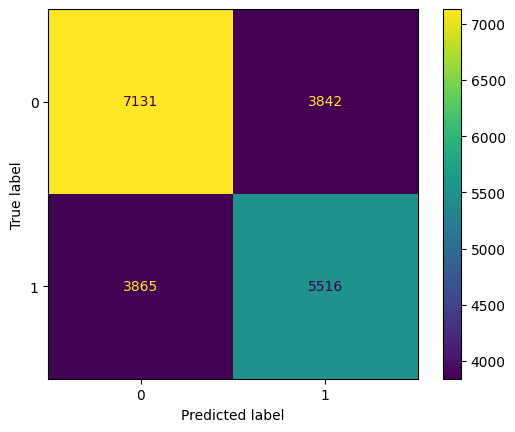

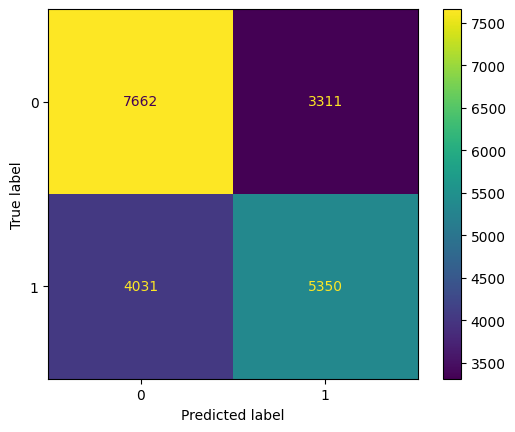

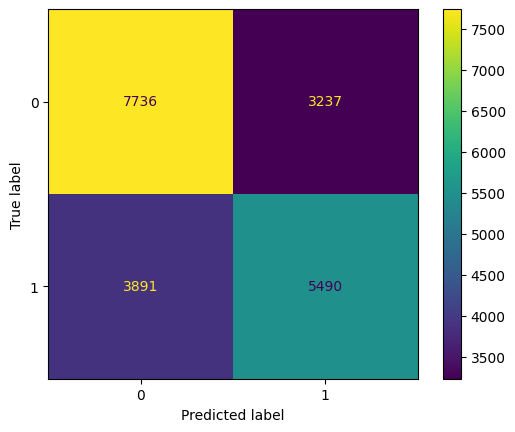

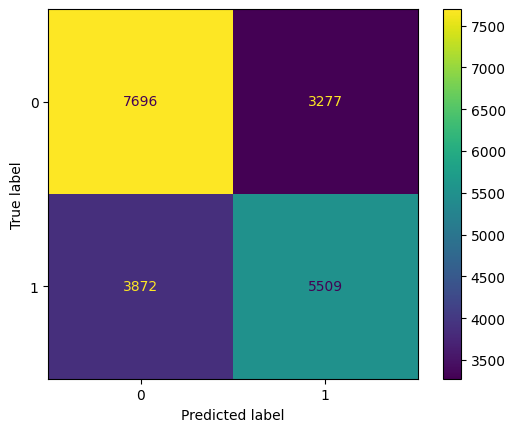

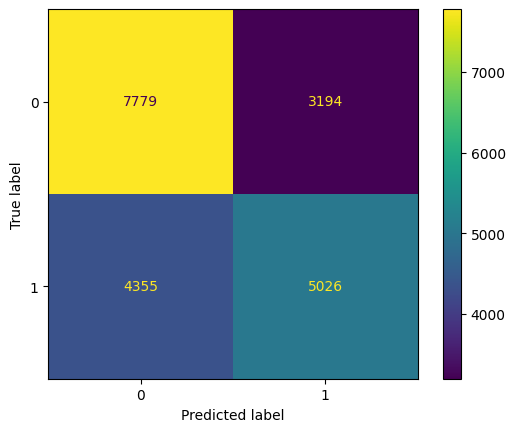

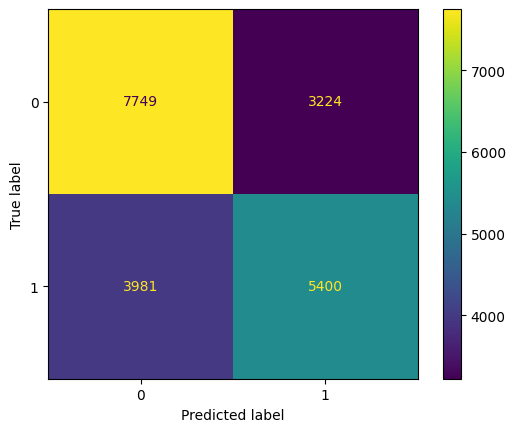

In [59]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1
        ),
    "extra_trees": ExtraTreesClassifier(
        n_estimators=50, 
        max_depth=None,           
        random_state=42,
        n_jobs=-1
    ),
    "boost_classifier":GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    print(f"\n========== {name} ==========")
    
    # Fit model
    model.fit(X_train_res, y_train_res)
    
    # Predict
    y_pred = model.predict(X_test_enc)
    y_proba = model.predict_proba(X_test_enc)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    recall = recall_score(y_test, y_pred)
    
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test ROC AUC: {test_auc:.4f}")
    print(f"Test Recall: {recall:.4f}")
    # print(classification_report(y_test, y_pred))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    
    results.append({
        "Model": name,
        "Test_ROC_AUC": test_auc,
        "Accuracy": acc,
        "Recall": recall
    })


In [60]:
#  Summary
results_df = pd.DataFrame(results).sort_values(by='Test_ROC_AUC', ascending=False)
print("\n==================== Model Performance Summary Smote ====================")
display(results_df)


==================== Model Performance Summary Smote ====================


,Model,Test_ROC_AUC,Accuracy,Recall
2,XGBoost,0.703494,0.649799,0.585225
3,LightGBM,0.700929,0.648767,0.587251
5,boost_classifier,0.696899,0.646016,0.575632
1,RandomForest,0.691265,0.639285,0.570302
4,extra_trees,0.674453,0.629115,0.535764
0,LogisticRegression,0.662954,0.621352,0.587997



========== LogisticRegression ==========


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.6219
Test ROC AUC: 0.6564
Test Recall: 0.4062

========== RandomForest ==========
Test Accuracy: 0.6377
Test ROC AUC: 0.6915
Test Recall: 0.5156

========== XGBoost ==========


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:33:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.6502
Test ROC AUC: 0.7034
Test Recall: 0.5668

========== LightGBM ==========
[LightGBM] [Info] Number of positive: 37521, number of negative: 43891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460878 -> initscore=-0.156809
[LightGBM] [Info] Start training from score -0.156809


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 0.6456
Test ROC AUC: 0.7030
Test Recall: 0.5350

========== extra_trees ==========
Test Accuracy: 0.6218
Test ROC AUC: 0.6656
Test Recall: 0.4996

========== boost_classifier ==========
Test Accuracy: 0.6418
Test ROC AUC: 0.6968
Test Recall: 0.4940


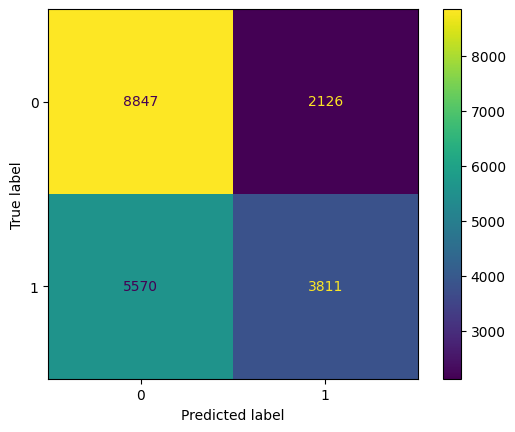

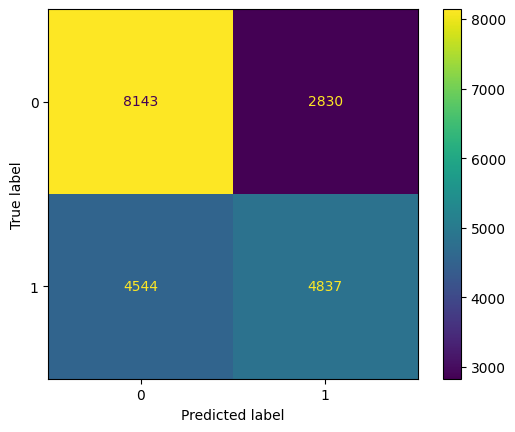

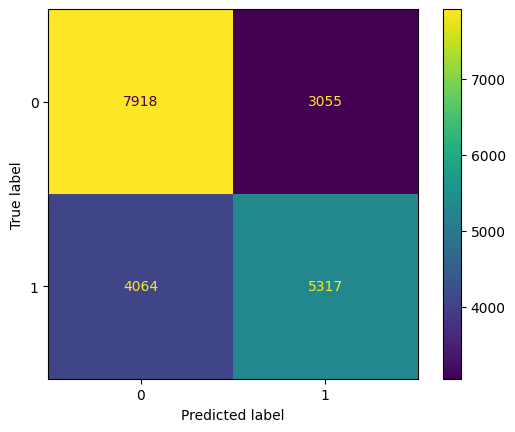

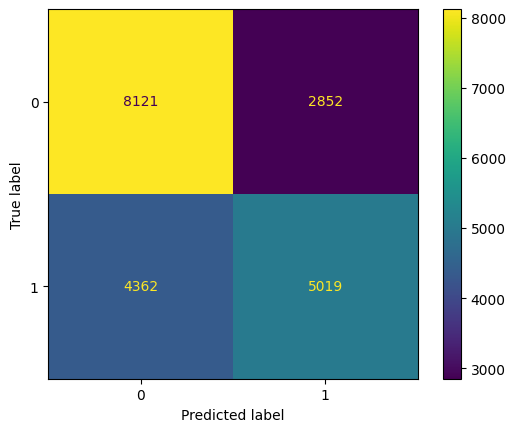

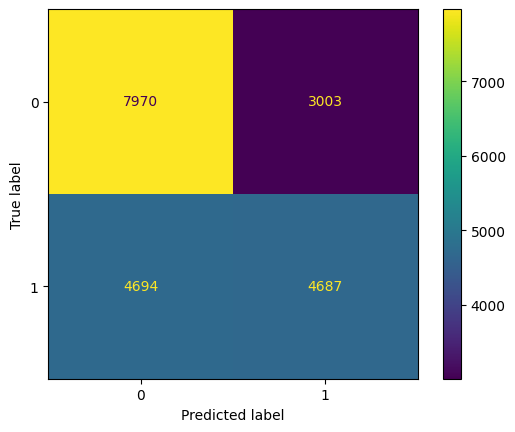

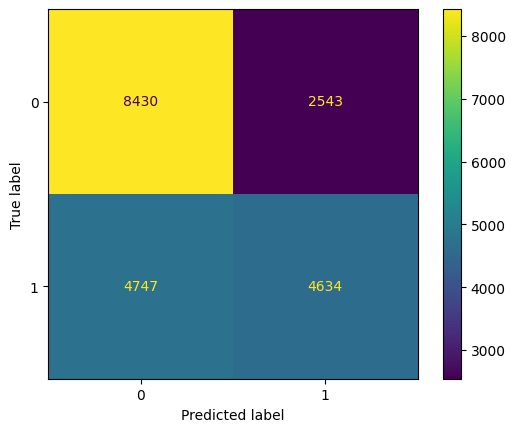

In [72]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1
        ),
    "extra_trees": ExtraTreesClassifier(
        n_estimators=50, 
        max_depth=None,           
        random_state=42,
        n_jobs=-1
    ),
    "boost_classifier":GradientBoostingClassifier()
}

results_no_smote = []

for name, model in models.items():
    print(f"\n========== {name} ==========")
    
    # Fit model
    clf = Pipeline([
    ('preprocessor', preprocessor_all),
    ('model', model)
])
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    recall = recall_score(y_test, y_pred)
    
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test ROC AUC: {test_auc:.4f}")
    print(f"Test Recall: {recall:.4f}")
    # print(classification_report(y_test, y_pred))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    
    results_no_smote.append({
        "Model": name,
        "Test_ROC_AUC": test_auc,
        "Accuracy": acc,
        "Recall": recall
    })


In [73]:
#  Summary
results_df = pd.DataFrame(results_no_smote).sort_values(by='Test_ROC_AUC', ascending=False)
print("\n==================== Model Performance Summary ====================")
display(results_df)


==================== Model Performance Summary ====================


,Model,Test_ROC_AUC,Accuracy,Recall
2,XGBoost,0.703418,0.650241,0.566784
3,LightGBM,0.703032,0.645573,0.535018
5,boost_classifier,0.696849,0.641839,0.493977
1,RandomForest,0.691499,0.637712,0.515617
4,extra_trees,0.665623,0.621843,0.499627
0,LogisticRegression,0.656379,0.621893,0.406247


### Tuning

In [80]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import joblib

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_ordinal = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

top_models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    # "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'),
}

param_grids = {
    "XGBoost": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [3, 5, 7],
        "classifier__learning_rate": [0.01, 0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__colsample_bytree": [0.8, 1.0]
    },
    "LightGBM": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [-1, 5, 10],
        "classifier__learning_rate": [0.01, 0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__colsample_bytree": [0.8, 1.0],
        "classifier__num_leaves": [31, 50, 70]
    },
    "RandomForest": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [None, 10, 20, 30],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__bootstrap": [True, False]
    }
}

best_models = {}
tuned_results = []

for name, model in top_models.items():
    print(f"\n==================== Hyperparameter Tuning: {name} ====================")

    # Build pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor_ordinal),
        ('classifier', model)
    ])

    # Randomized Search for efficiency
    search = RandomizedSearchCV(
        pipe,
        param_distributions=param_grids[name],
        n_iter=15,
        scoring='roc_auc',
        n_jobs=-1,
        cv=3,
        verbose=2,
        random_state=42
    )

    # Fit search
    search.fit(X_train, y_train)

    print(f"Best Parameters for {name}: {search.best_params_}")
    print(f"Best CV ROC AUC: {search.best_score_:.4f}")

    # Evaluate on test set
    y_pred = search.predict(X_test)
    y_proba = search.predict_proba(X_test)[:, 1]

    test_auc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test ROC AUC: {test_auc:.4f}")
    # print(classification_report(y_test, y_pred))

    # Save best model
    best_models[name] = search.best_estimator_


    tuned_results.append({
        "Model": name,
        "Best_CV_ROC_AUC": search.best_score_,
        "Test_ROC_AUC": test_auc,
        "Test_Accuracy": acc
    })

tuned_results_df = pd.DataFrame(tuned_results).sort_values(by="Test_ROC_AUC", ascending=False)
print("\n==================== Tuned Model Performance ====================")
display(tuned_results_df)

best_model_name = tuned_results_df.iloc[0]["Model"]
best_model = best_models[best_model_name]

joblib.dump(best_model, f"best_{best_model_name.lower().replace(' ', '_')}_model.joblib")
print(f"\n Saved best model: {best_model_name}")



==================== Hyperparameter Tuning: XGBoost ====================
Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters for XGBoost: {'classifier__subsample': 1.0, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.8}
Best CV ROC AUC: 0.7041
Test Accuracy: 0.6511
Test ROC AUC: 0.7077

==================== Hyperparameter Tuning: LightGBM ====================
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 37521, number of negative: 43891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460878 -> initscore=-0.156809
[LightGBM] [Info] Start training from score -0.156809
[LightGBM] [Warning] No further splits with pos

C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 0.6502
Test ROC AUC: 0.7087

==================== Tuned Model Performance ====================


,Model,Best_CV_ROC_AUC,Test_ROC_AUC,Test_Accuracy
1,LightGBM,0.704616,0.708661,0.650241
0,XGBoost,0.704127,0.707654,0.651076



 Saved best model: LightGBM


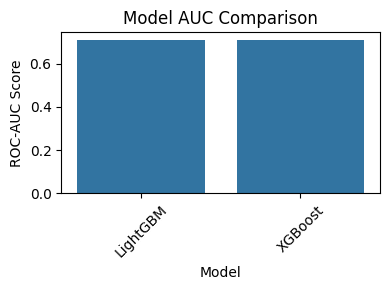

In [95]:
# model AUC compare
plt.figure(figsize=(4, 3))
sns.barplot(x="Model", y="Test_ROC_AUC", data=tuned_results_df)
plt.title("Model AUC Comparison")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
# Conclusion
best_model_name = tuned_results_df.iloc[0]["Model"]
best_auc = tuned_results_df.iloc[0]["Test_ROC_AUC"]

print(f"\nBest Model: {best_model_name}")
print(f"ROC-AUC: {best_auc:.4f}")



Best Model: LightGBM
ROC-AUC: 0.7087



Top 30 Important Features:
                          Feature  Importance
14                    cat__diag_1         597
15                    cat__diag_2         508
5         num__num_lab_procedures         479
16                    cat__diag_3         456
2   num__discharge_disposition_id         455
7            num__num_medications         361
0                    num__age_num         253
4           num__time_in_hospital         223
10          num__number_inpatient         186
3        num__admission_source_id         185
11          num__number_diagnoses         184
1          num__admission_type_id         174
6             num__num_procedures         163
8          num__number_outpatient         140
9           num__number_emergency         117
36                   cat__insulin         113
12                      cat__race         101
18                 cat__A1Cresult          65
43               cat__diabetesMed          58
13                    cat__gender          51
19    

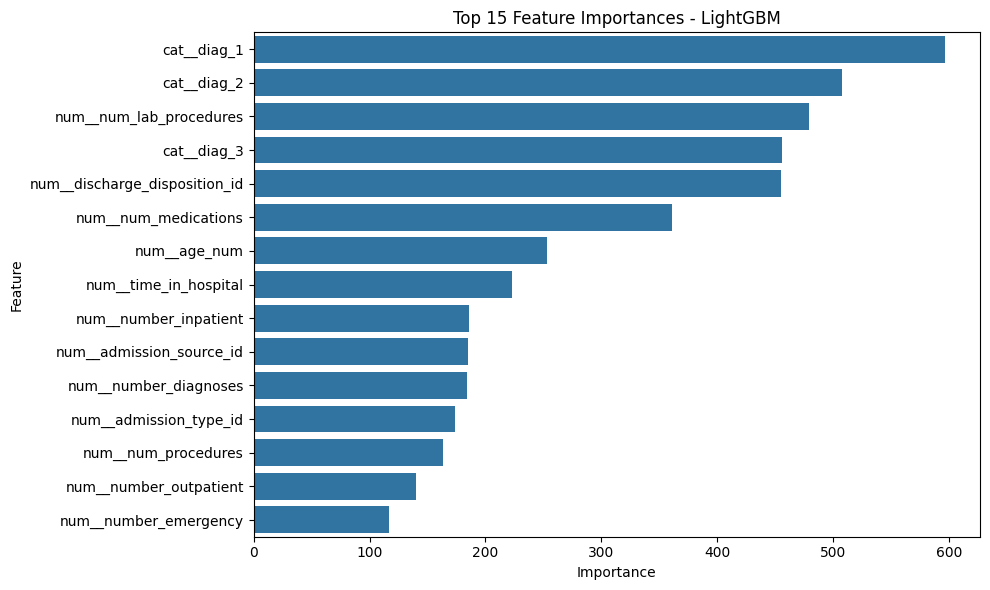

In [98]:
if hasattr(best_model.named_steps['classifier'], "feature_importances_"):
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out(X_train.columns)
    importances = best_model.named_steps['classifier'].feature_importances_

    feat_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 30 Important Features:")
    print(feat_imp.head(30))

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
    plt.title(f"Top 15 Feature Importances - {best_model_name}")
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importances not available for this model type.")

In [76]:
import optuna
# from optuna.integration import SklearnPipelineSampler

def objective(trial):
    params = {
        "classifier__max_depth": trial.suggest_int("max_depth", 3, 10),
        "classifier__learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "classifier__n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "classifier__subsample": trial.suggest_float("subsample", 0.7, 1.0)
    }
    
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
    ])
    
    score = cross_val_score(clf.set_params(**params), X_train, y_train, cv=3, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
print(study.best_params)


[I 2025-11-07 13:03:48,155] A new study created in memory with name: no-name-418a59c3-73e3-4806-9014-36004d13cdee
C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:03:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:03:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:04:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-11-07 13:04:25,723] Trial 0 fini

{'max_depth': 6, 'learning_rate': 0.07921712972334702, 'n_estimators': 293, 'subsample': 0.7001350142404607}


In [77]:
print(study.best_value)

0.705165283365807


In [79]:
print(study.trials)

[FrozenTrial(number=0, state=1, values=[0.7019005842529212], datetime_start=datetime.datetime(2025, 11, 7, 13, 3, 48, 159464), datetime_complete=datetime.datetime(2025, 11, 7, 13, 4, 25, 723297), params={'max_depth': 6, 'learning_rate': 0.12163404213219821, 'n_estimators': 381, 'subsample': 0.835199900891893}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=400, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.7, step=None)}, trial_id=0, value=None), FrozenTrial(number=1, state=1, values=[0.6995689724966105], datetime_start=datetime.datetime(2025, 11, 7, 13, 4, 25, 726346), datetime_complete=datetime.datetime(2025, 11, 7, 13, 4, 37, 621173), params={'max_depth': 3, 'learning_rate': 0.23111253249625716, 'n_estimators': 116, 'subsample': 0.88268637186

### Inference model

In [105]:
# load model
import joblib

pipe = joblib.load('best_lightgbm_model.joblib') 

In [110]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_num,readmitted_map
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,NO,5,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,Ch,Yes,>30,15,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,Yes,NO,25,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,Ch,Yes,NO,35,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,Ch,Yes,NO,45,0


In [108]:
X_train.iloc[0]

age_num                                  55
race                        AfricanAmerican
gender                               Female
admission_type_id                         1
discharge_disposition_id                  1
admission_source_id                       7
time_in_hospital                          5
num_lab_procedures                       66
num_procedures                            1
num_medications                          13
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
diag_1                                  511
diag_2                                  584
diag_3                                  496
number_diagnoses                          7
max_glu_serum                           NaN
A1Cresult                               NaN
metformin                                No
repaglinide                              No
nateglinide                              No
chlorpropamide                  

In [119]:
single_row = test_data.iloc[0]
# DataFrame
single_row_df = pd.DataFrame([single_row], columns=X_train.columns)
single_row_df
# Then predict
# pred = pipe.predict(single_row_df)

,age_num,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
25118,55,AfricanAmerican,Female,1,1,7,5,66,1,13,...,No,No,No,No,No,No,No,No,No,No


In [120]:
pred = pipe.predict(single_row_df)
pred

C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([0])

In [123]:
single_row10 = test_data.iloc[100]
# DataFrame
single_row_df10 = pd.DataFrame([single_row10], columns=X_train.columns)
# Then predict
pred = pipe.predict(single_row_df10)
pred

C:\Users\sudwa\Desktop\hospital_readmission\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([1])

In [126]:
"""The best Performing models on tabular data are Xgboost, lightgm, gradient boosting and Random forest classifier"""

'The best Performing models on tabular data are Xgboost, lightgm, gradient boosting and Random forest classifier'

### SMOTENC imblance data

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTENC

In [42]:
#preprocessing
candidate_cols = [
     'age_num', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
    'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed'
]

# Only features are used
X = df[candidate_cols].copy()
y = df['readmitted_map'].copy()

# Automatically detect numeric and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"Numeric: {len(num_features)} | Categorical: {len(cat_features)}")

Numeric: 12 | Categorical: 32


In [43]:
### Data split test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
# Preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

# Fit-transform training data
print("Applying preprocessor...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# print(f"before process {X_train.shape} and after process {X_train_processed.shape}")

Applying preprocessor...


In [48]:
# Handle imbalance (using SMOTENC)
# print("Applying Smotenc....")
# sm = SMOTENC(categorical_features=[i for i in range(len(num_features), len(num_features)+len(cat_features))],
#              random_state=42)

# X_res, y_res = sm.fit_resample(X_train_processed, y_train)
# print(f"before process {X_train.shape} and after process {X_res.shape}")

In [49]:
# Train model
# model = RandomForestClassifier(
#     n_estimators=200,
#     random_state=42,
#     n_jobs=-1,
#     class_weight='balanced_subsample'  # helps handle residual imbalance
# )

# print("🧠 Training model...")
# model.fit(X_res, y_res)
# print("✅ Model trained.")

# # 🧪 4. Evaluate
# preds = model.predict(X_test_processed)
# probs = model.predict_proba(X_test_processed)[:, 1]

# print(classification_report(y_test, preds))
# print(f"AUC = {roc_auc_score(y_test, probs):.4f}")


Applying preprocessor...
Model training...
Test Accuracy: 0.6396
Recall: 0.576
Precision: 0.617
F1-score: 0.596
ROC-AUC: 0.693


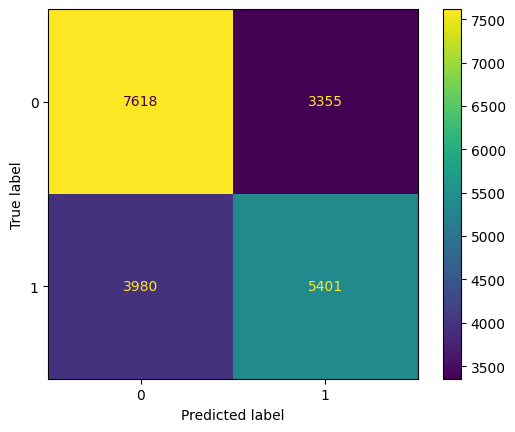

In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

# Fit-transform training data
print("Applying preprocessor...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = BalancedRandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
print("Model training...")
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

test_auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

This result is for clean data with model Random Forest Classifier: RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
Cross-Validation ROC AUC: 0.6918 ± 0.0017
Test Accuracy: 0.6394
Test ROC AUC: 0.6930

This result is for BalancedRandomForestClassifier model: 
Test Accuracy: 0.6396 
Test ROC AUC: 0.693

Accuracy: 0.6396
Recall: 0.5757
Precision: 0.6168
F1-score: 0.5956
ROC-AUC: 0.6927


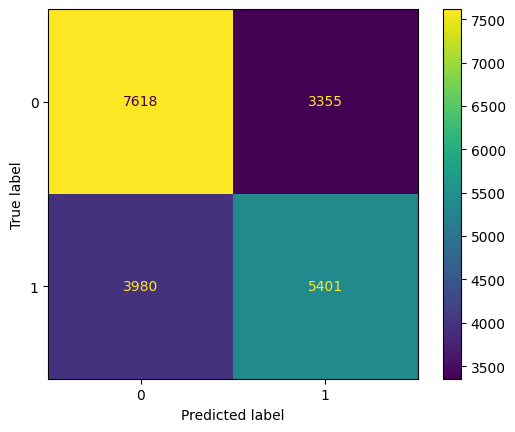

In [51]:
#pipeleine
full_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', BalancedRandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

full_model.fit(X_train, y_train)
y_pred = full_model.predict(X_test)
y_proba = full_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Inference model

In [44]:
candidate_cols = [
    'diag_1', 'diag_2', 'diag_3', 'num_lab_procedures', 'discharge_disposition_id', 'num_medications', 'age_num', 'time_in_hospital',
    'number_inpatient', 'admission_source_id', 'number_diagnoses', 'admission_type_id', 'num_procedures',
    'number_outpatient', 'number_emergency', 'insulin', 'race', 'gender', 'A1Cresult', 'diabetesMed', 'readmitted_map'
]

test = df[candidate_cols]
tests=test.iloc[10]
tests

diag_1                                250.7
diag_2                                  403
diag_3                                  996
num_lab_procedures                       47
discharge_disposition_id                  1
num_medications                          17
age_num                                  45
time_in_hospital                          9
number_inpatient                          0
admission_source_id                       7
number_diagnoses                          9
admission_type_id                         1
num_procedures                            2
number_outpatient                         0
number_emergency                          0
insulin                              Steady
race                        AfricanAmerican
gender                               Female
A1Cresult                               NaN
diabetesMed                             Yes
readmitted_map                            1
Name: 10, dtype: object